In [1]:
%run utils.ipynb
%run data_encoder.ipynb

In [2]:
import math
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [3]:
salamander_piano_dataset, encode_note, decode_note = encode_salamander_piano_data()

Extracting data from SalamanderGrandPiano-FreePats...
Extracted 4147 + 957 data points from SalamanderGrandPiano-FreePats!


In [4]:
gnb = GaussianNB()
gnb.fit(salamander_piano_dataset.X_train, salamander_piano_dataset.y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
y_pred_test = gnb.predict(salamander_piano_dataset.X_test)
test_discrepancies = (salamander_piano_dataset.y_test != y_pred_test)

y_pred_train = gnb.predict(salamander_piano_dataset.X_train)
train_discrepancies = (salamander_piano_dataset.y_train != y_pred_train)

print("Number of mislabeled test points out of a total {} points : {}"
       .format(len(salamander_piano_dataset.X_test), test_discrepancies.sum()))
print("Number of mislabeled train points out of a total {} points : {}"
       .format(len(salamander_piano_dataset.X_train), train_discrepancies.sum()))

print('\n Test Discrepancies:')
for idx, prediction in enumerate(y_pred_test):
    if not test_discrepancies[idx]:
        continue
    
    print(' [{}]: Predicted {} but expected {}'.format(idx, prediction, salamander_piano_dataset.y_test[idx]))

Number of mislabeled test points out of a total 957 points : 1
Number of mislabeled train points out of a total 4147 points : 17

 Test Discrepancies:
 [197]: Predicted A4 but expected A5


{0: 0.07471901535149714, 80: 0.05614399055073106, 860: 0.05859934214983219, 870: 0.10300231808899099, 880: 1.0, 890: 0.08540516077911013}


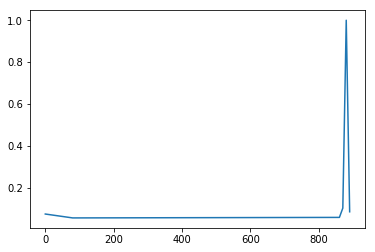

In [6]:
CheckBadDataPoint = True

if CheckBadDataPoint:
    import matplotlib.pyplot as plt

    bad_data_point = salamander_piano_dataset.test_data[197]
    
    frequencies = bad_data_point.frequencies()
    amplitudes = bad_data_point.data

    frequencies = [freq for idx, freq in enumerate(frequencies) if amplitudes[idx] > 0]
    amplitudes = [ampl for ampl in amplitudes if ampl > 0]
    
    print(dict(zip(frequencies, amplitudes)))

    plt.figure()
    plt.plot(frequencies, amplitudes)
    plt.show()

    generate_frequencies(dict(zip(frequencies, amplitudes)), 3, 'bad_data_point.wav')